In [1]:
import sys 

from IPython import display 
from PIL import Image

import base64
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"


sys.path.append("..")
sys.path.append("../utlities")
from utlities.display import display_emails_from_query 
from utlities.directories import PROJECT_ASSETS_FOLDER

PROJECT_ASSETS_FOLDER

'/Users/charlienatoli/coding_projects/email_content_search/assets'

# Test cases where Keyword RAG performs better

Keyword RAG generates more relevant results that CLIP-based index when asked about marketing-specific concepts that aren't immediately visible in the email. 


### Back in stock email 
Definiton: a reminder that a product has been restocked <br>
Keyword RAG - 5/5 relevant <br>
Image embeddings - 1/5 relevant (anchovies email)

In [8]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from IPython.display import Image, display

def html_to_image_firefox(html_string, output_filename, width=1200, height=1600):
    # Create a temporary HTML file
    with open('temp.html', 'w') as f:
        f.write(html_string)

    output_path = os.path.join(PROJECT_ASSETS_FOLDER, output_filename.lower().replace(" ", "_") + ".png")
    
    # Setup Firefox options
    firefox_options = Options()
    firefox_options.add_argument("--headless")
    
    # Initialize the driver
    driver = webdriver.Firefox(options=firefox_options)
    driver.set_window_size(width, height)
    html_base64 = base64.b64encode(html_string.encode('utf-8')).decode('utf-8')
    driver.get(f"data:text/html;base64,{html_base64}")
    
    # # Wait for any JavaScript to load (if needed)
    # time.sleep(2)
    
    # Take a screenshot
    driver.save_screenshot(output_path)
    
    # Close the driver
    driver.quit()
    
    # Remove temporary file
    os.remove('temp.html')
    
    return Image(filename=output_path)

def create_and_save_keyword_rag_results_display(
        query="Abandoned Cart", 
        keyword_rag_index_name='email-type', 
        clip_index_name="clip-email-index"   
):
    
    html_string = display_emails_from_query(
           query,
            keyword_rag_index_name=keyword_rag_index_name,
            clip_index_name=clip_index_name
        )              


    return html_to_image_firefox(html_string, query)
 
    



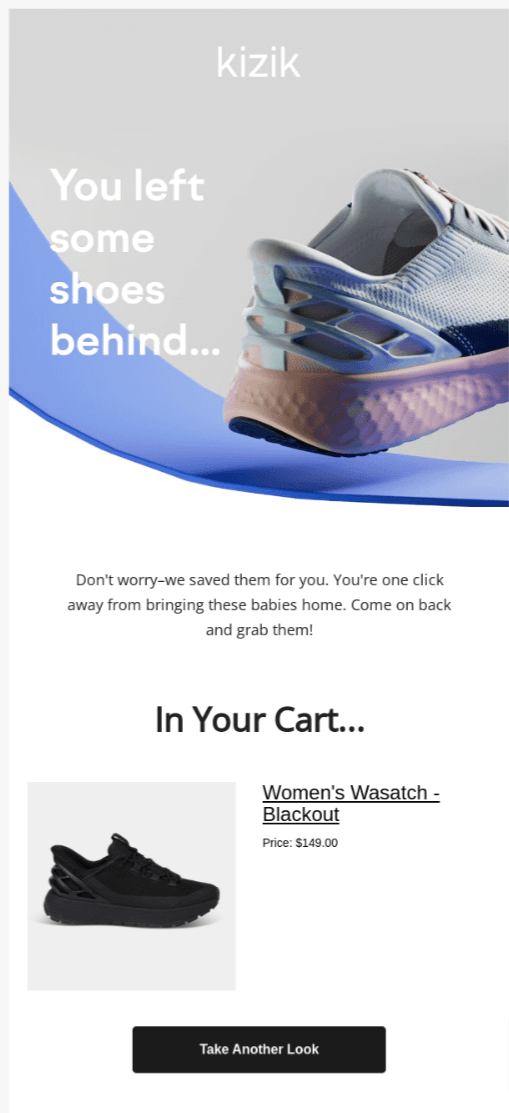
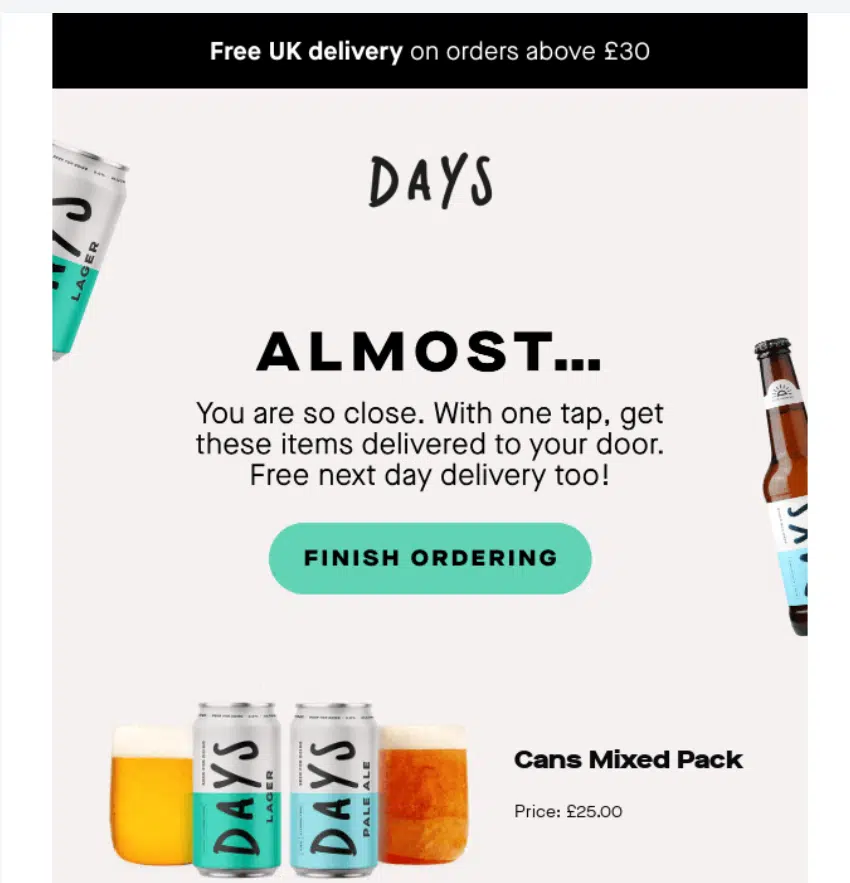
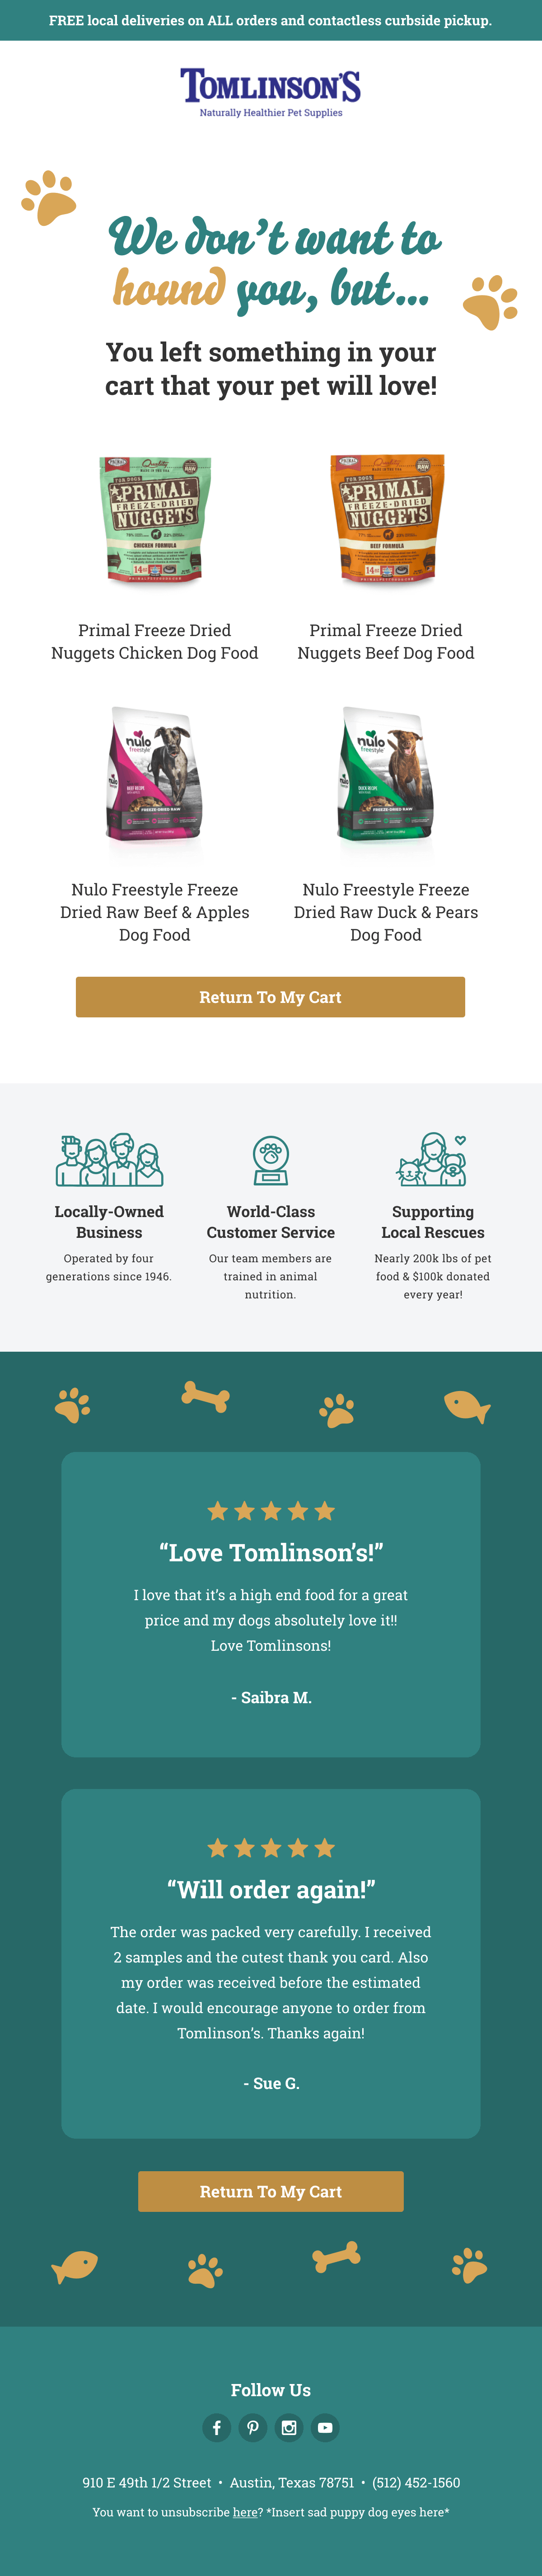
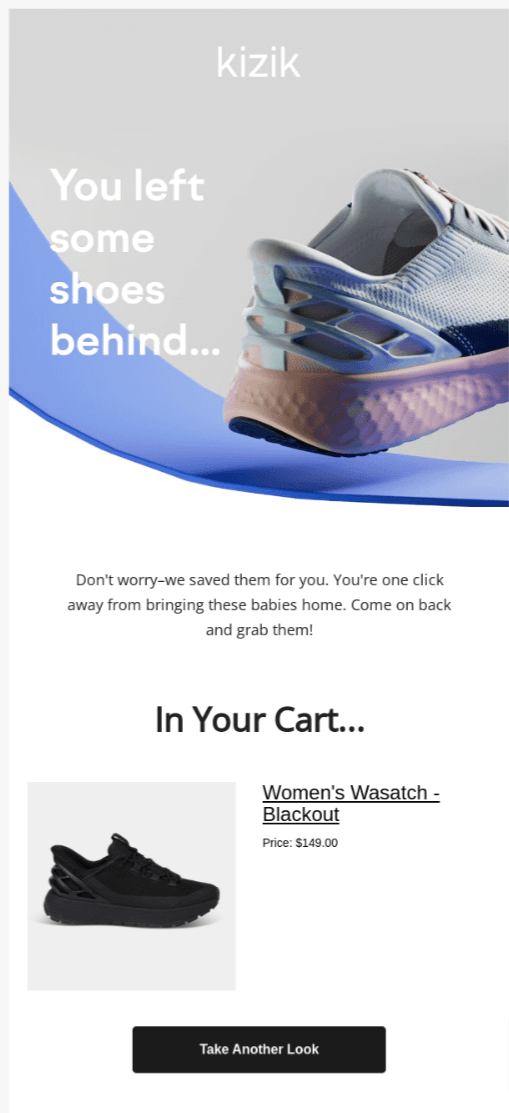
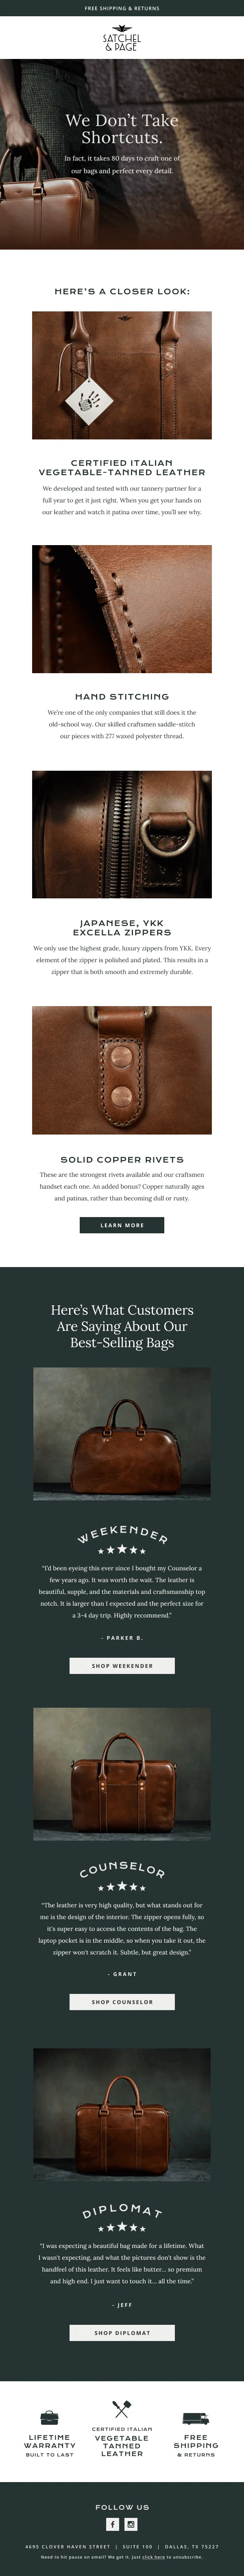
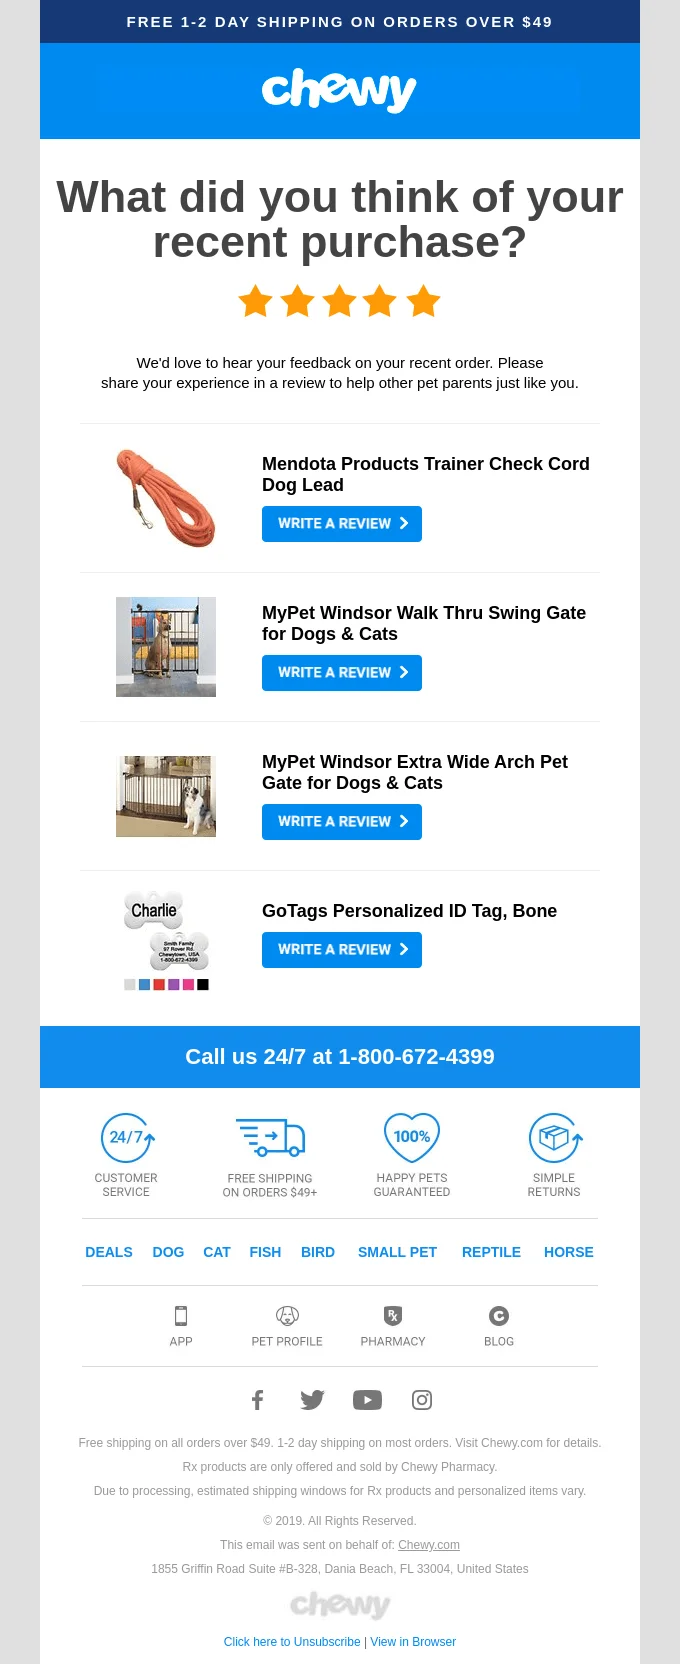
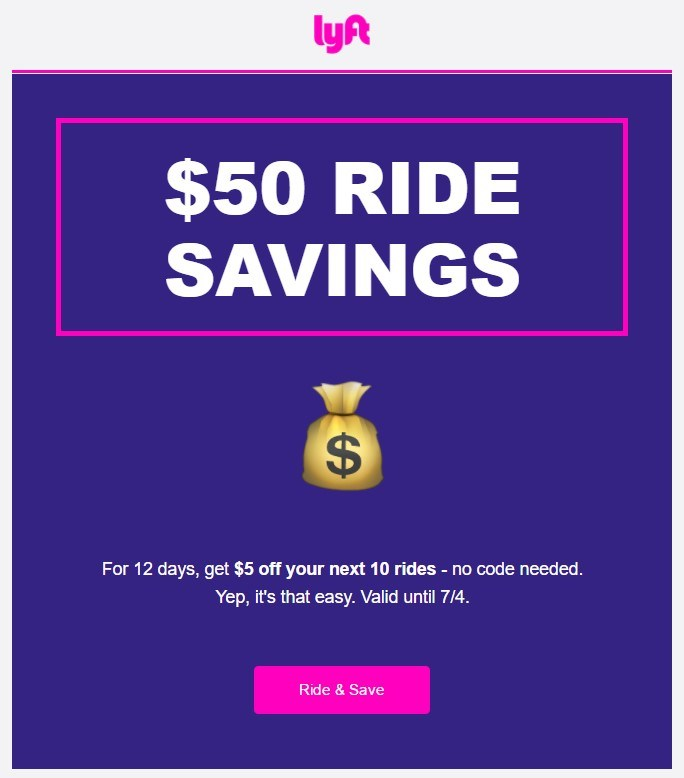
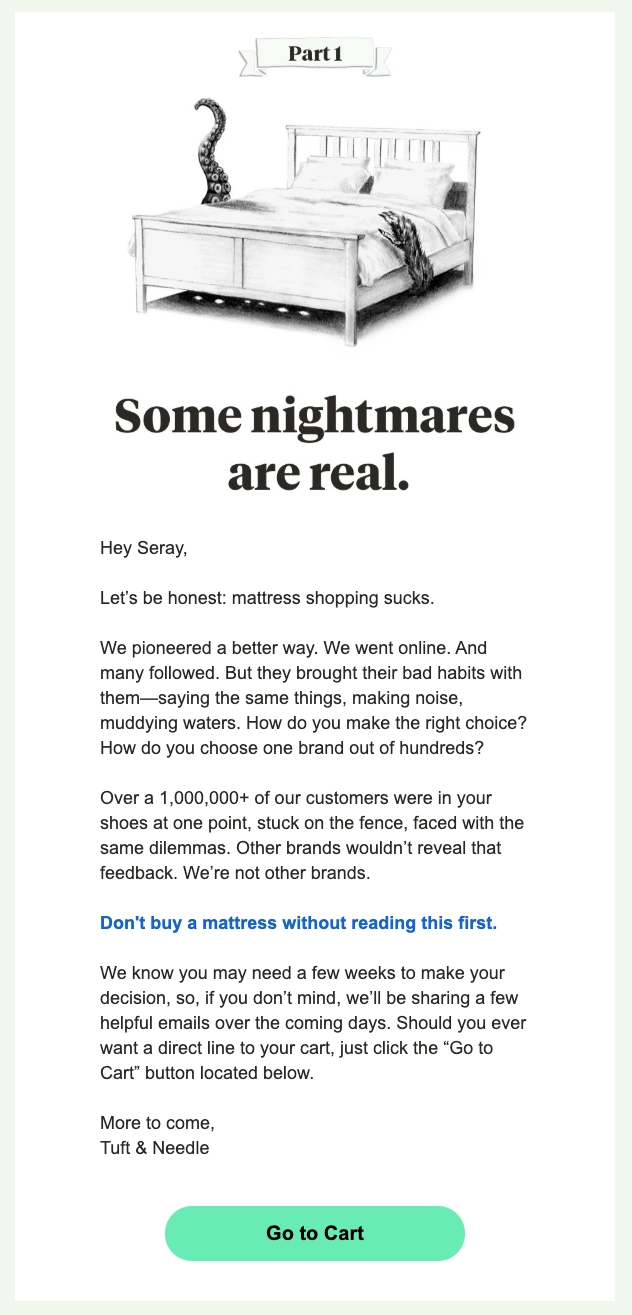

In [18]:

# file = display.display(display.HTML(
#     display_emails_from_query(
#         "Abandoned Cart", 
#         keyword_rag_index_name='email-type', 
#         clip_index_name="clip-email-index"
#     )
# )) 



### abandoned cart
Definiton: reminder to finish a purchasing a product that was put in your shopping cart<br>
Keyword RAG - 5/5 relevant <br>
Image embeddings - 2/5 relevant (kizik shoes, matress shopping)

In [3]:
display.display(display.HTML(
    display_emails_from_query(
        "Abandoned Cart", 
        keyword_rag_index_name='email-type', 
        clip_index_name="clip-email-index"
    )
)) 

Test - when using a different query, we still get similar results 

In [4]:
# display.display(display.HTML(
#     display_emails_from_query(
#         "Cart abandon followup", 
#         keyword_rag_index_name='email-type', 
#         clip_index_name="clip-email-index"
#     )
# )) 

### Social proof
Definiton: reminder to finish a purchasing a product that was put in your shopping cart<br>
Keyword RAG - 5/5 relevant <br>
Image embeddings - 0/5 relevant (kizik shoes, matress shopping)

In [3]:
display.display(display.HTML(
    display_emails_from_query(
        "Social proof", 
        keyword_rag_index_name='email-type', 
        clip_index_name="clip-email-index"
    )
)) 

# Test cases - Keyword RAG and baseline image search perform similarly

The two indices perform similarly if the concept that is searched for is more explicitly mentioned or visible in the email (eg "Clearance Sale")

### Product Recommendations
Keyword RAG - 4/5 emails include extra recommended products (everything except SAS) <br>
Image embeddings - 4/5 as well (everything except Satchel and Page)

In [4]:
# display.display(display.HTML(
#     display_emails_from_query(
#         "product recommendations", 
#         keyword_rag_index_name='email-type', 
#         clip_index_name="clip-email-index"
#     )
# )) 

### Sale
Keyword RAG - 5/5 emails are about a sale event <br>
Image embeddings - 3/5 (uncommon goods, simply the best, anyday)

In [5]:
# display.display(display.HTML(
#     display_emails_from_query(
#         "sale", 
#         keyword_rag_index_name='email-type', 
#         clip_index_name="clip-email-index"
#     )
# )) 

### Sale event
Keyword RAG - 5/5 emails are about a sale event <br>
Image embeddings - 3/5 (uncommon goods, simply the best, anyday)